<a href="https://colab.research.google.com/github/AnnaZamriy/NM/blob/main/%D0%9B%D0%A09_%D0%97%D0%B0%D0%BC%D1%80%D1%96%D0%B9_3%D0%92.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

f'(x) = -cos(x) + 1/(x + 1)
f''(x) = sin(x) - 1/(x + 1)**2
f'''(x) = cos(x) + 2/(x + 1)**3
f''''(x) = -sin(x) - 6/(x + 1)**4
f(0) = 0
T(x) = 0.5*x**3 - 0.5*x**2


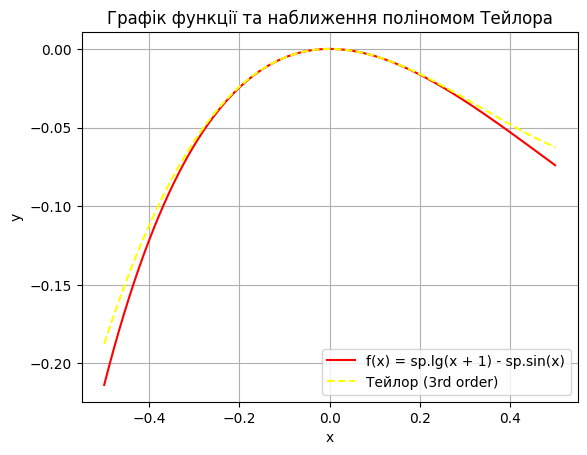

In [5]:
#Лабораторна робота 10. Наближення функцій багаточленом Тейлора.
#Варіант 1
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt

# Задаємо символьну змінну x та функцію f(x)
x = sp.symbols('x')
#f = sp.lg(x + 1) - sp.sin(x)
f = sp.ln(x + 1) - sp.sin(x)

# Знаходимо перші три похідні
f1 = sp.diff(f, x)
f2 = sp.diff(f1, x)
f3 = sp.diff(f2, x)
f4 = sp.diff(f3, x)

# Виводимо похідні
print("f'(x) =", f1)
print("f''(x) =", f2)
print("f'''(x) =", f3)
print("f''''(x) =", f4)

# Знаходимо значення функції та її похідних в точці x=0
x0 = 0
f_x0 = f.subs(x, x0).evalf()
f1_x0 = f1.subs(x, x0).evalf()
f2_x0 = f2.subs(x, x0).evalf()
f3_x0 = f3.subs(x, x0).evalf()

# Обчислюємо значення полінома Тейлора в точці x=0
T = f_x0 + f1_x0*(x-x0) + (f2_x0/2)*(x-x0)**2 + (f3_x0/6)*(x-x0)**3

# Виводимо значення функції та її наближення за поліномом Тейлора в точці x=0
print("f(0) =", f_x0.round(3))
print("T(x) =",T.evalf())

# Будуємо графіки
x_vals = np.linspace(-0.5, 0.5, 1000)
f_vals = np.array([f.subs(x, xi).evalf() for xi in x_vals])
T_vals = np.array([T.subs(x, xi).evalf() for xi in x_vals])

fig, ax = plt.subplots()
ax.plot(x_vals, f_vals, label='f(x) = sp.lg(x + 1) - sp.sin(x)', color='red')
ax.plot(x_vals, T_vals, label='Тейлор (3rd order)', color='yellow', linestyle='--')
ax.legend()
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_title("Графік функції та наближення поліномом Тейлора")
plt.grid(True)
plt.show()


Перша похідна f'(x): -cos(x) + 1/(x + 1)
Друга похідна f''(x): sin(x) - 1/(x + 1)**2
Третя похідна f'''(x): cos(x) + 2/(x + 1)**3
Значення функції в точці x0=0: 0.0


<lambdifygenerated-9>:2: RuntimeWarning: invalid value encountered in log
  return log(x + 1) - sin(x)


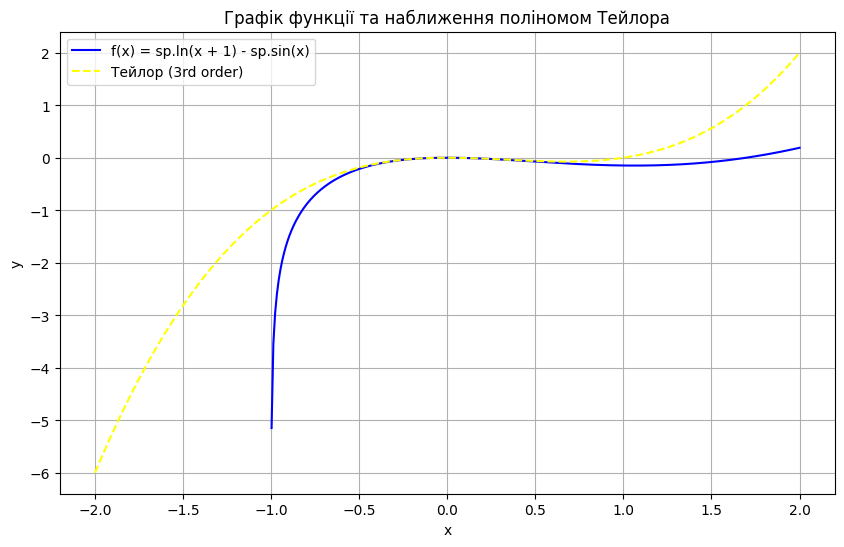

In [14]:
#Варіант 2
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp

# Задаємо символьну змінну x
x_sym = sp.symbols('x')
# Задана функція
f = sp.ln(x_sym + 1) - sp.sin(x_sym)
# Обчислюємо перші три похідні
f_1 = sp.diff(f, x_sym)
f_2 = sp.diff(f_1, x_sym)
f_3 = sp.diff(f_2, x_sym)
# Виводимо похідні
print("Перша похідна f'(x):", f_1)
print("Друга похідна f''(x):", f_2)
print("Третя похідна f'''(x):", f_3)
# Компілюємо функції з SymPy в функції Python
f_func = sp.lambdify(x_sym, f, 'numpy')
f_1_func = sp.lambdify(x_sym, f_1, 'numpy')
f_2_func = sp.lambdify(x_sym, f_2, 'numpy')
f_3_func = sp.lambdify(x_sym, f_3, 'numpy')
# Точка x0
x0 = 0
# Значення функції та многочлена Тейлора в точці x0
f_x0 = f_func(x0)
# Виведення значень
print(f"Значення функції в точці x0={x0}: {f_x0}")
# Діапазон значень x
x = np.linspace(-2, 2, 400)
# Значення функції та поліном Тейлора
f_x = f_func(x)
taylor_x = f_func(0) + f_1_func(0) * x + (f_2_func(0) * x**2) / 2 + (f_3_func(0) * x**3) / 6
# Побудова графіків
plt.figure(figsize=(10, 6))
plt.plot(x, f_x, label='f(x) = sp.ln(x + 1) - sp.sin(x)', color='blue')
plt.plot(x, taylor_x, label='Тейлор (3rd order)', color='yellow', linestyle='--')
plt.legend()
plt.title('Графік функції та наближення поліномом Тейлора')
plt.xlabel('x')
plt.ylabel('y')
plt.grid()
plt.show()


taylor=        15         14         13         12         11         10
7.336 x  - 14.84 x  - 10.49 x  + 36.39 x  - 1.439 x  - 34.28 x 
          9         8         7         6         5          4
 + 9.819 x + 15.17 x - 6.034 x - 3.295 x + 1.566 x + 0.1761 x
          3          2
 + 0.171 x - 0.2241 x - 0.5622 x - 2.148e-17


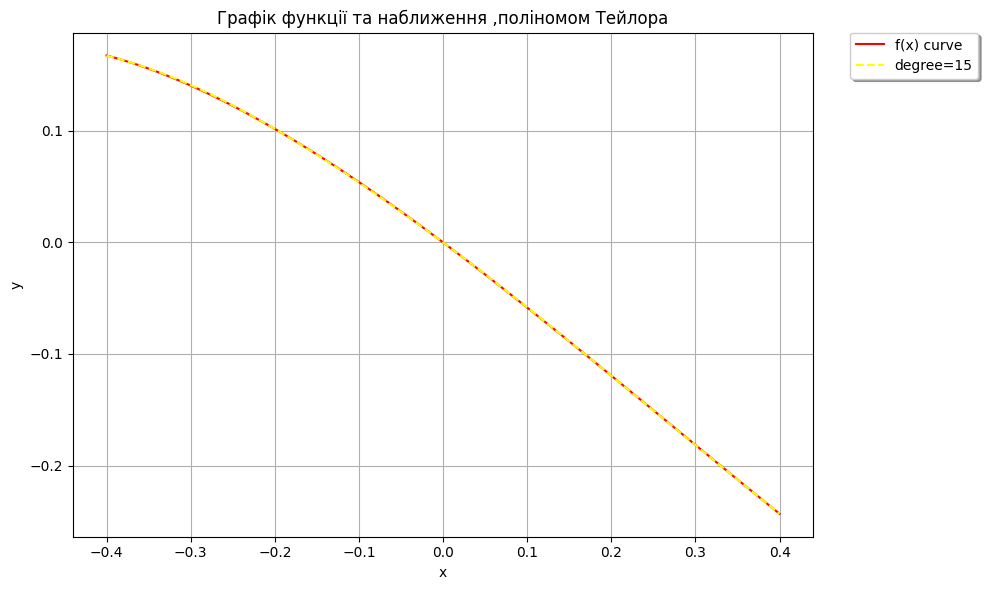

In [15]:
#Побудова полімонома Тейлора за допомогою approximate_taylor_polynomial
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import approximate_taylor_polynomial

# Задана функція
def f(x):
    return np.log10(x + 1) - np.sin(x)
x = np.linspace(-0.4, 0.4, num=51)
plt.figure(figsize=(10, 6))
plt.plot(x, f(x), label="f(x) curve", color='red')
degree = 15
taylor = approximate_taylor_polynomial(f, 0, degree, 1)
print('taylor=', taylor)
plt.plot(x, taylor(x), label=f"degree={degree}", color='yellow', linestyle='--' )
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left',borderaxespad=0.0, shadow=True)
plt.xlabel("x")
plt.ylabel("y")
plt.title("Графік функції та наближення ,поліномом Тейлора")
plt.tight_layout()
plt.grid()
plt.show()

/tmp/ipython-input-2007998753.py:5: RuntimeWarning: invalid value encountered in log10
  plt.plot(x, np.log10(x + 1) - np.sin(x), label="sin curve")


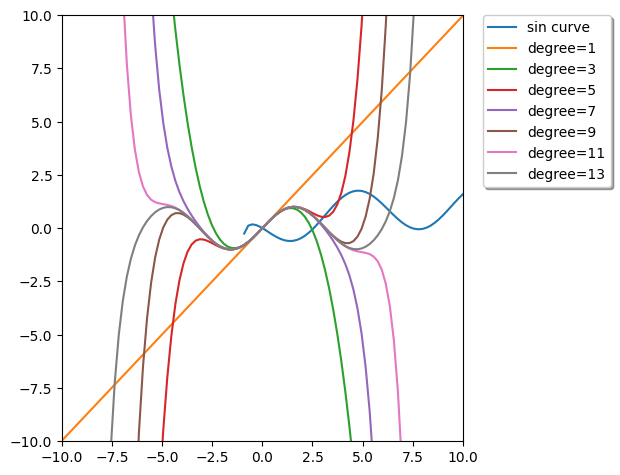

In [18]:

import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import approximate_taylor_polynomial
x = np.linspace(-10.0, 10.0, num=100)
plt.plot(x, np.log10(x + 1) - np.sin(x), label="sin curve")
for degree in np.arange(1, 15, step=2):
    sin_taylor = approximate_taylor_polynomial(np.sin, 0, degree, 1,
                                               order=degree + 2)
    plt.plot(x, sin_taylor(x), label=f"degree={degree}")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left',
           borderaxespad=0.0, shadow=True)
plt.tight_layout()
plt.axis([-10, 10, -10, 10])
plt.show()